In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from data_load import load_aggregate_data
from distance_map import load_distance_map
from gridload import load_grid_graph
from data_analyze import calculate_metrics
from sklearn.linear_model import LinearRegression

# Data analysis post-EDA

In [3]:
dc = 820
# date = datetime(2024, 5, 23)

In [4]:
df = load_aggregate_data(dc=dc)
dist_map = load_distance_map(dc=dc)

In [5]:
df.to_csv(f"Data/Cleaned Data/DC{dc}.csv", date_format='%Y-%m-%d %H:%M:%S', index=False)

# How Often Double Stack Pallets

In [14]:
dc = 800
date = datetime(2024, 5, 23)
df = load_aggregate_data(dc=dc)
users = list(set(df["user"]))
df.head()

,id,from_time,from_locn,to_time,to_locn,user,time_taken
0,UM14164401,2024-02-14 16:36:24,682,2024-02-14 16:37:18,58,127,54.0
1,UT13451031,2024-02-14 16:37:12,632,2024-02-14 16:37:41,163,40,29.0
2,UM14164397,2024-02-14 16:37:28,682,2024-02-14 16:37:55,64,127,27.0
3,UW13738464,2024-02-14 16:40:35,622,2024-02-14 16:41:14,105,90,39.0
4,UH14181595,2024-02-14 16:42:18,632,2024-02-14 16:42:47,144,40,29.0


In [15]:
# calculate number of times double stack happens
num_double_stacked = 0
num_pallets = 0
for user in users:
    df_user = df[df["user"] == user]
    # loop through task list
    i = 0
    while i < df_user.shape[0]:
        # detect if this and next pallet are double stacked
        if i < df_user.shape[0] - 1 and ((df_user.iloc[i]["to_time"] >= df_user.iloc[i+1]["from_time"]) or (df_user.iloc[i+1]["from_time"] - df_user.iloc[i]["from_time"]).total_seconds() < 20):
            num_pallets += 2
            num_double_stacked += 2
            i += 2
        else:
            num_pallets += 1
            i += 1
print(f"Double Stack Proportion: {num_double_stacked / num_pallets * 100}%")

Double Stack Proportion: 44.93732505780699%


# Diff in High/Low Performing Operators

In [2]:
dc = 800
date = datetime(2024, 5, 26)
df = load_aggregate_data(dc=dc, date=date)
df

,id,from_time,from_locn,to_time,to_locn,user,time_taken
184527,US65173679,2024-05-26 00:00:13,80,2024-05-26 00:02:17,158,111,124.0
184528,US65173680,2024-05-26 00:00:15,80,2024-05-26 00:00:40,59,111,25.0
184529,US65173681,2024-05-26 00:00:43,80,2024-05-26 00:01:15,57,58,32.0
184530,US65173682,2024-05-26 00:01:27,80,2024-05-26 00:02:50,53,58,83.0
184531,US65189200,2024-05-26 00:03:25,25,2024-05-26 00:05:10,153,73,105.0
...,...,...,...,...,...,...,...
189126,US65236599,2024-05-26 23:57:27,68,2024-05-26 23:58:23,127,62,56.0
189127,US65185179,2024-05-26 23:57:43,100,2024-05-26 23:59:16,142,111,93.0
189128,US65185178,2024-05-26 23:57:44,100,2024-05-26 23:58:56,142,111,72.0
189129,US65185402,2024-05-26 23:58:45,106,2024-05-26 23:59:54,123,73,69.0


In [4]:
# high performers: 38
# low performers: 71, 92
df_38 = df[df["user"] == 38]

In [5]:
from gridload import bfs_path
grid, dock_map = load_grid_graph("Crossdock Maps/DC800.csv")
df_38 = df[df["user"] == 38]

In [6]:
paths = []
pickup_deliveries = []
# find pickup_deliveries
i = 0
while i < df_38.shape[0]:
    # check if next task time stamps are the same
    if i < df_38.shape[0] - 1:
        if df_38.iloc[i]["from_time"] == df_38.iloc[i+1]["from_time"]:
            i += 1
    pickup_deliveries.append([df_38.iloc[i]["from_locn"], df_38.iloc[i]["to_locn"]])
    i += 1
# find paths
for i in range(len(pickup_deliveries)):
    pair = pickup_deliveries[i]
    if pair[0] == pair[1]:
        continue
    path = bfs_path(grid, dock_map[str(pair[0])], dock_map[str(pair[1])])
    paths.append(path)
    if i < len(pickup_deliveries) - 1:
        return_pair = [pickup_deliveries[i][1], pickup_deliveries[i+1][0]]
        return_path = bfs_path(grid, dock_map[str(return_pair[0])], dock_map[str(return_pair[1])])
        paths.append(return_path)

# DC 840 Locations

In [11]:
df = load_aggregate_data(dc=dc)

In [13]:
set(df["to_locn"])

{'106',
 '108',
 '110',
 '112',
 '114',
 '116',
 '118',
 '120',
 '122',
 '124',
 '126',
 '128',
 '130',
 '132',
 '134',
 '136',
 '138',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '183',
 '185',
 '187',
 '189',
 '191',
 '193',
 '195',
 '197',
 '199',
 '213',
 '215',
 '217',
 '219',
 '221',
 '223',
 '225',
 '227',
 '229',
 '23',
 '231',
 '233',
 '235',
 '237',
 '239',
 '24',
 '241',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '48',
 '50',
 '52',
 '54',
 '56',
 '58',
 '62',
 '631',
 '64',
 '641',
 '651',
 '66',
 '661',
 '68',
 '70',
 '72',
 '74',
 '76',
 '78',
 '80',
 '82',
 '84',
 '86',
 '88',
 'IBNP'}

# Locate and remove PTC to PTC movement

In [8]:
from data_load import load_historical_receiving_ptc_data, clean_receiving_ptc_data
df = load_historical_receiving_ptc_data(f"Data/Receiving to PTC/DC{dc} to PTC.csv")
df = clean_receiving_ptc_data(df, dc)

In [5]:
df_qc = df[df["to_locn"].str.startswith("Q")]
df_qc

,id,from_time,from_locn,to_time,to_locn,user,time_taken


In [13]:
ptc = ["611", "621", "631", "641", "651", "661", "671", "681", "691", "612", "622", "632", "642", "652", "662", "672", "682", "692", "IBNP", "MNOB"]

In [11]:
PTCtoPTC = 0
for i in range(df.shape[0]):
    if df["from_locn"].iloc[i] in ptc and df["to_locn"].iloc[i] in ptc:
        PTCtoPTC += 1
        print(i)

10250
10951
46364
50014
50015
50016
50017
50018


# Classification / Composition of Routes

In [6]:
ptc = ["611", "621", "631", "641", "651", "661", "671", "681", "691", "612", "622", "632", "642", "652", "662", "672", "682", "692", "IBNP", "MNOB", "C", "BRK"]

In [7]:
toPTC = 0
fromPTC = 0
PTCtoPTC = 0
xdock = 0
start_date = datetime(2024, 5, 15)  # Define your start date
end_date = datetime(2024, 6, 12)  # Define your end date
def datetime_range(start_date, end_date, step=1, interval='day'):
  """Iterate over datetimes or dates with a specified step and interval."""
  delta = {'day': timedelta(days=step), 'week': timedelta(days=7*step)}[interval]
  while start_date <= end_date:
    yield start_date
    start_date += delta
for date in datetime_range(start_date, end_date):
    print(date)
    df = load_aggregate_data(
            dc=dc, date=date
    )
    for i in range(df.shape[0]):
        row = df.iloc[i]
        from_locn = row["from_locn"]
        to_locn = row["to_locn"]
        # check if toPTC
        if from_locn in ptc and not to_locn in ptc:
            fromPTC += 1
        elif not from_locn in ptc and to_locn in ptc:
            toPTC += 1
        elif not from_locn in ptc and not to_locn in ptc:
            xdock += 1
        elif from_locn in ptc and to_locn in ptc:
            PTCtoPTC += 1
        else:
            print(from_locn, to_locn)

2024-05-15 00:00:00
2024-05-16 00:00:00
2024-05-17 00:00:00
2024-05-18 00:00:00
2024-05-19 00:00:00
2024-05-20 00:00:00
2024-05-21 00:00:00
2024-05-22 00:00:00
2024-05-23 00:00:00
2024-05-24 00:00:00
2024-05-25 00:00:00
2024-05-26 00:00:00
2024-05-27 00:00:00
2024-05-28 00:00:00
2024-05-29 00:00:00
2024-05-30 00:00:00
2024-05-31 00:00:00
2024-06-01 00:00:00
2024-06-02 00:00:00
2024-06-03 00:00:00
2024-06-04 00:00:00
2024-06-05 00:00:00
2024-06-06 00:00:00
2024-06-07 00:00:00
2024-06-08 00:00:00
2024-06-09 00:00:00
2024-06-10 00:00:00
2024-06-11 00:00:00
2024-06-12 00:00:00


[21807, 16052, 205, 135891]


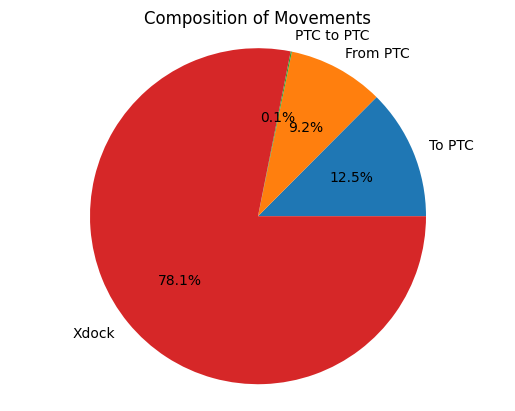

In [8]:
data = [toPTC, fromPTC, PTCtoPTC, xdock]
print(data)
labels = ["To PTC", "From PTC", "PTC to PTC", "Xdock"]
plt.pie(data, labels=labels, autopct="%1.1f%%")
plt.title('Composition of Movements')
plt.axis('equal')  
plt.show()

# Linear Regress Time vs. Distance

In [4]:
df["distances"] = 0

In [5]:
def calculate_distance(row):
    start = row["from_locn"]
    end = row["to_locn"]
    dist = dist_map.get((start, end), 100) * 6.5
    return dist

df["distances"] = df.apply(calculate_distance, axis=1)

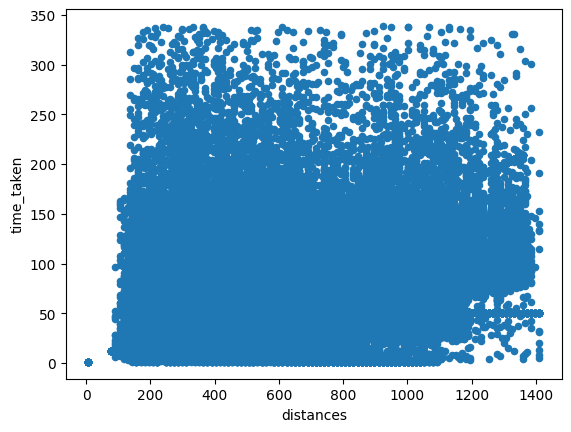

In [6]:
df.plot.scatter(x="distances", y="time_taken")
plt.show()

In [7]:
model = LinearRegression()
model.fit(df[["distances"]], df[["time_taken"]])
r2_score = model.score(df[["distances"]], df[["time_taken"]])
print(f"R-squared value: {r2_score}")
print(model.coef_)
print(model.intercept_)

R-squared value: 0.18327461146156843
[[0.06054249]]
[37.13916925]


# Dock door analysis

In [26]:
df = load_aggregate_data(
        "Xdock Data/DC800 Xdock V1.csv",
        "PTC to Shipping/DC800 PTC Out.csv",
        "Dock-PTC Data/DC800 to PTC.csv",
        "Receiving to IBNP/DC800 Putaway IBNP.csv",
)
def calculate_distance(row):
    start = row["from_locn"]
    end = row["to_locn"]
    dist = dist_map.get((start, end), 100) * 6.5
    return dist

df["distances"] = df.apply(calculate_distance, axis=1)

c:\Users\ctang\OneDrive - BJ's Wholesale Club, Inc PROD\Documents\Forklift Project Code\Code\data_load.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.drop(columns=["TEST"])


In [ ]:
dock_doors = [i for i in range(167, 136, -2)] + [i for i in range(133, 88, -2)] + [85, 83, 81, 79]
dock_doors = [str(dock) for dock in dock_doors]
avg_distances = []
for dock_door in dock_doors:
    dock_door = str(dock_door)
    df_filtered_to = df[df["to_locn"] == dock_door]
    df_filtered_from = df[df["from_locn"] == dock_door]
    df_filtered = pd.concat([df_filtered_from, df_filtered_to])
    avg_distance = sum(df_filtered["distances"]) / df_filtered.shape[0]
    avg_distances.append(avg_distance)
    print(f"{dock_door} {int(avg_distance)}")

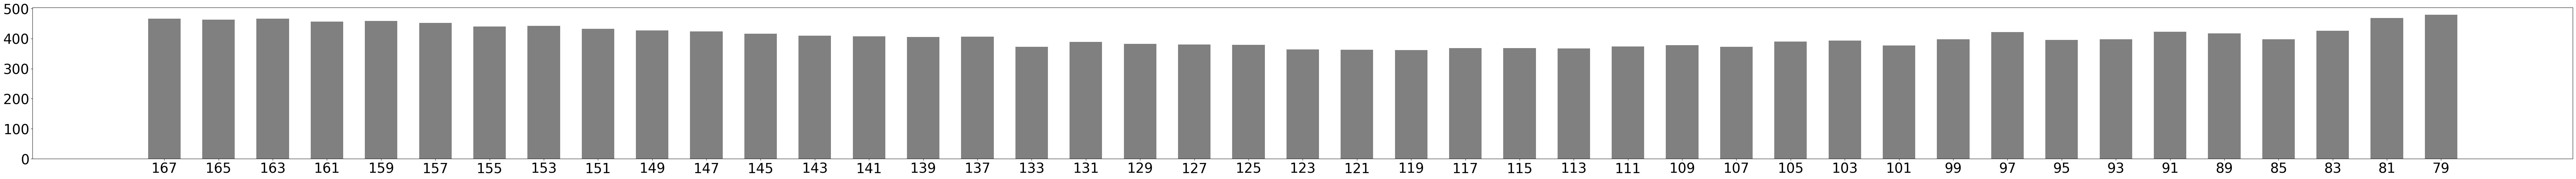

In [43]:
plt.figure(figsize=(100, 6))
plt.bar(dock_doors, avg_distances, color="grey", width=0.6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# KPI Measurements over Time

In [2]:
dc = 820

In [3]:
start_date = datetime(2024, 5, 15)  # Define your start date
end_date = datetime(2024, 6, 12)  # Define your end date

In [4]:
# data for distribution
# distribution data
avg_distance = []
inefficient_ratio = []
pallet_hr = []
# temporal data
dates = []
dist_data = []
ineff_data = []
pallet_data = []

In [5]:
def datetime_range(start_date, end_date, step=1, interval='day'):
  """Iterate over datetimes or dates with a specified step and interval."""
  delta = {'day': timedelta(days=step), 'week': timedelta(days=7*step)}[interval]
  while start_date <= end_date:
    yield start_date
    start_date += delta

In [6]:
for date in datetime_range(start_date, end_date):
    print(date)
    dates.append(date)
    try:
        metrics = calculate_metrics(date, dc)
    except Exception as e:
        print(e)
        continue
    counter = 0
    avg_dist = 0
    avg_ineff = 0
    avg_pallet = 0
    for user in metrics.keys():
        if metrics[user]["num_pallets"] > 30:
            avg_distance.append(metrics[user]["avg_distance"])
            avg_dist += metrics[user]["avg_distance"]
            inefficient_ratio.append(metrics[user]["inefficient%"])
            avg_ineff += metrics[user]["inefficient%"]
            pallet_hr.append(metrics[user]["pallets/hr"])
            avg_pallet += metrics[user]["pallets/hr"]
            counter += 1
    # Temporal data
    dist_data.append(avg_dist / counter)
    ineff_data.append(avg_ineff / counter)
    pallet_data.append(avg_pallet / counter)

2024-05-15 00:00:00
2024-05-16 00:00:00
2024-05-17 00:00:00
2024-05-18 00:00:00
2024-05-19 00:00:00
2024-05-20 00:00:00
2024-05-21 00:00:00
2024-05-22 00:00:00
2024-05-23 00:00:00
2024-05-24 00:00:00
2024-05-25 00:00:00
2024-05-26 00:00:00
2024-05-27 00:00:00
2024-05-28 00:00:00
2024-05-29 00:00:00
2024-05-30 00:00:00
2024-05-31 00:00:00
2024-06-01 00:00:00
2024-06-02 00:00:00
2024-06-03 00:00:00
2024-06-04 00:00:00
('35', '90')
2024-06-05 00:00:00
2024-06-06 00:00:00
2024-06-07 00:00:00
2024-06-08 00:00:00
2024-06-09 00:00:00
2024-06-10 00:00:00
2024-06-11 00:00:00
2024-06-12 00:00:00


In [35]:
print(np.mean(avg_distance))
print(np.median(avg_distance))

805.9850924854445
761.21375


In [7]:
print(avg_distance)
print(inefficient_ratio)
print(pallet_hr)
print(dist_data)
print(ineff_data)
print(pallet_data)

date_list = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

[770.6685425101215, 892.3455913978495, 706.13956, 828.148495145631, 740.9596132596686, 702.1091208791208, 817.5670491803278, 779.5603980099502, 961.8452046783626, 878.7921176470588, 890.9341333333333, 848.4499029126213, 781.3338679245282, 983.8787903225807, 680.8144351464435, 582.3963157894738, 777.1560606060606, 851.7332044198895, 876.8863114754099, 1206.8063101604278, 691.5387084870848, 692.5149344978166, 1876.57, 762.9981308411216, 1366.735657894737, 1062.3111931818182, 1792.6907692307693, 733.0564035087718, 669.8926020408164, 722.6269281045752, 910.0593220338983, 770.9735294117647, 756.5569512195121, 656.1782653061225, 771.2496296296296, 550.045, 707.4450490196078, 748.2310714285713, 707.8334146341463, 643.655, 565.7213157894737, 761.4422592592592, 1554.202638888889, 1051.8982352941177, 756.3159534883721, 616.3397619047619, 951.30875, 807.6316842105263, 973.9715909090909, 747.456875, 911.7032960893854, 762.2413953488372, 856.7615, 870.4979245283018, 731.8030275229357, 534.175000000

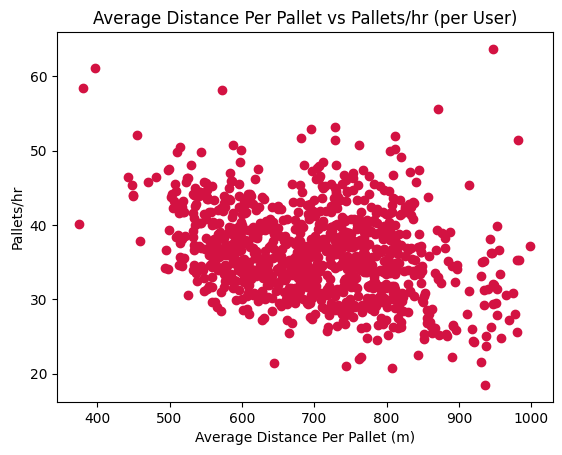

In [27]:
# scatter plot avg distance w pallets/hr
new_avg_distance = []
new_pph = []
for i in range(len(avg_distance)):
    if avg_distance[i] < 1000 and pallet_hr[i] < 80:
        new_avg_distance.append(avg_distance[i])
        new_pph.append(pallet_hr[i])

plt.scatter(new_avg_distance, new_pph, color="#D31242")
plt.xlabel("Average Distance Per Pallet (m)")
plt.ylabel("Pallets/hr")
plt.title("Average Distance Per Pallet vs Pallets/hr (per User)")
plt.show()

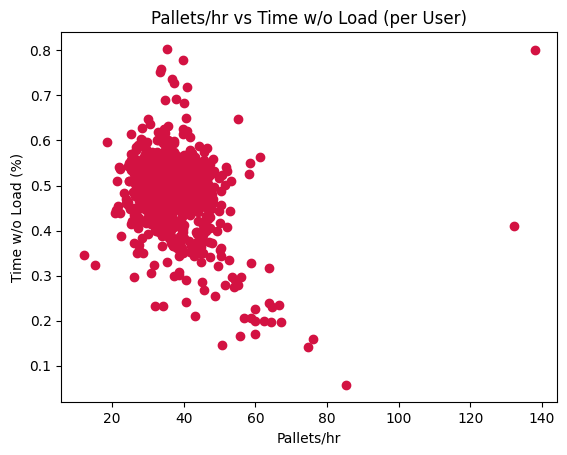

In [23]:
# scatter plot pallets_hr w ineff_ratio (per)

plt.scatter(pallet_hr, inefficient_ratio, color="#D31242")
plt.xlabel("Pallets/hr")
plt.ylabel("Time w/o Load (%)")
plt.title("Pallets/hr vs Time w/o Load (per User)")
plt.show()

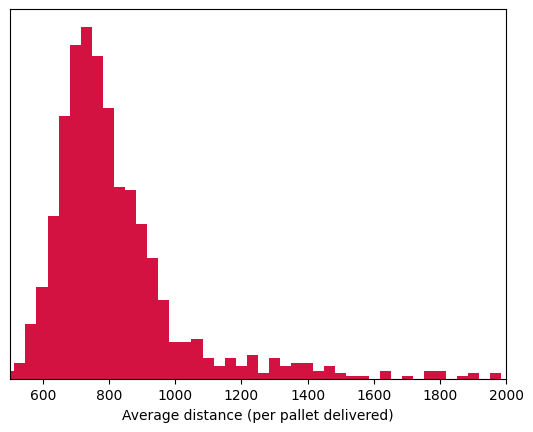

In [9]:
# plot avg distance pallets
plt.hist(avg_distance, bins=50, color="#D31242")
ax = plt.gca()
plt.xlabel("Average distance (per pallet delivered)")
ax.get_yaxis().set_visible(False)
plt.xlim([500, 2000])
plt.show()

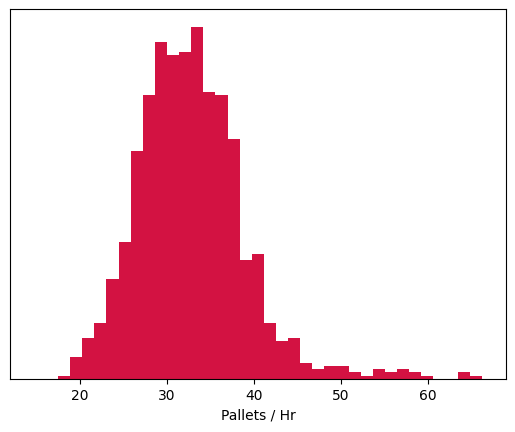

In [16]:
# plot pallets per hr pallets
plt.hist(pallet_hr, bins=50, color="#D31242")
ax = plt.gca()
plt.xlabel("Pallets / Hr")
ax.get_yaxis().set_visible(False)
plt.xlim([12, 69])
plt.show()

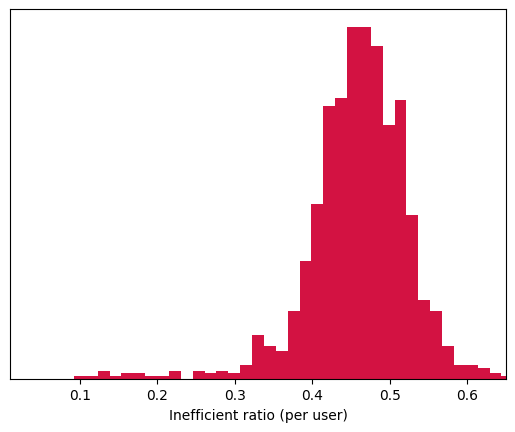

In [18]:
# plot time inefficient
plt.hist(inefficient_ratio, bins=50, color="#D31242")
ax = plt.gca()
plt.xlabel("Inefficient ratio (per user)")
ax.get_yaxis().set_visible(False)
plt.xlim([0.01, 0.65])
plt.show()

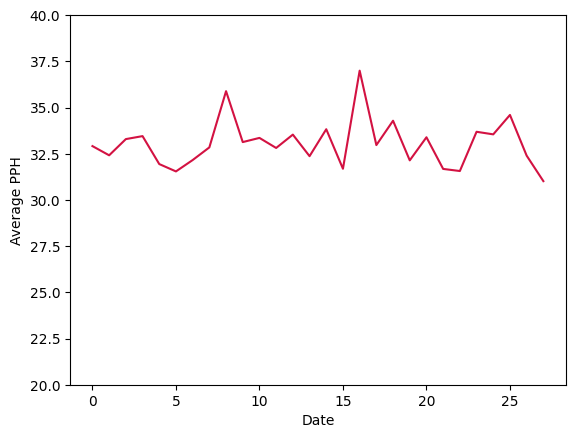

In [19]:
# plot ppr average over time
plt.plot([i for i in range(len(pallet_data))], pallet_data, color="#D31242")
ax = plt.gca()
plt.xlabel("Date")
plt.ylabel("Average PPH")
ax.set_ybound(lower= 20, upper= 40)
# ax.get_yaxis().set_visible(False)
plt.show()

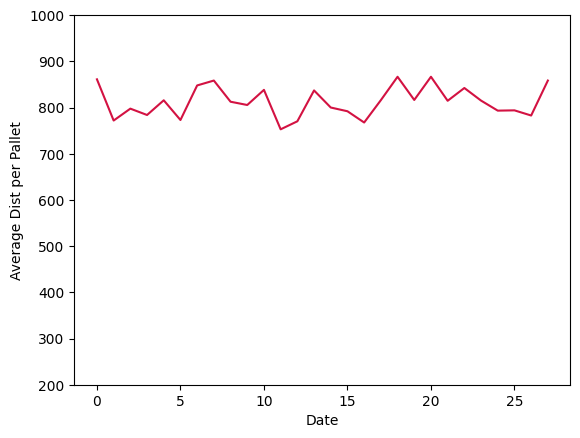

In [21]:
# plot avg dist of pallet
plt.plot([i for i in range(len(dist_data))], dist_data, color="#D31242")
ax = plt.gca()
plt.xlabel("Date")
plt.ylabel("Average Dist per Pallet")
ax.set_ybound(lower= 200, upper= 1000)
# ax.get_yaxis().set_visible(False)
plt.show()

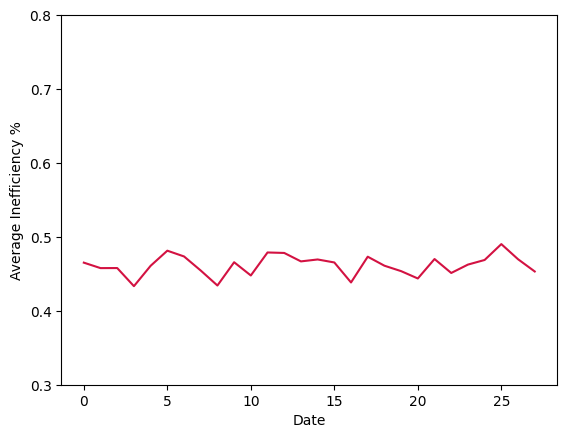

In [22]:
# plot avg ineff ratio of pallet
plt.plot([i for i in range(len(ineff_data))], ineff_data, color="#D31242")
ax = plt.gca()
plt.xlabel("Date")
plt.ylabel("Average Inefficiency %")
ax.set_ybound(lower=0.3, upper= 0.8)
# ax.get_yaxis().set_visible(False)
plt.show()

# Calculate Heatmaps

In [14]:
bubbles = []
grid, dock_map = load_grid_graph("Crossdock Maps/DC820.csv")

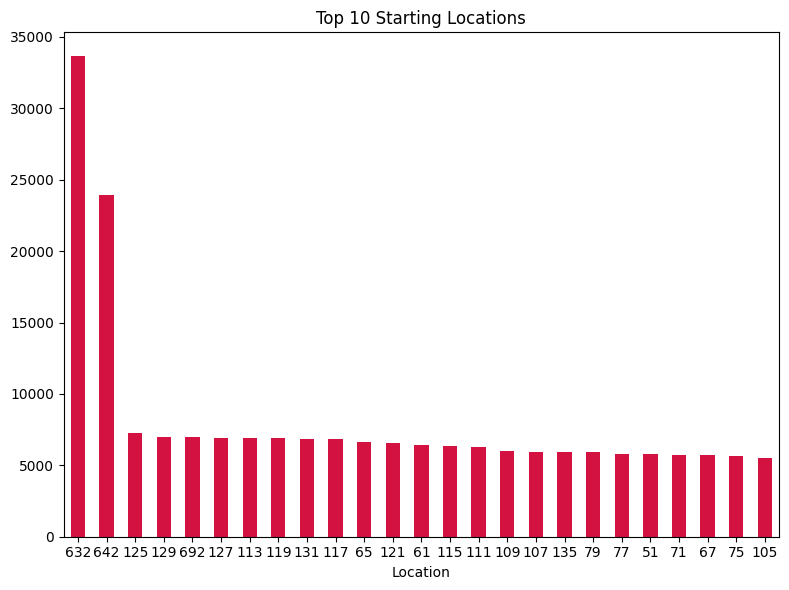

In [16]:
# Get top 10 most common start locns
most_common_from_locns = df['from_locn'].value_counts().head(25)  # Limit to top 10

# Create a chart
plt.figure(figsize=(8, 6))  # Set chart size
most_common_from_locns.plot(kind='bar', color='#D31242')
plt.title('Top 10 Starting Locations')
plt.xlabel('Location')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
bubbles = list(zip(most_common_from_locns.index, most_common_from_locns.values))

In [17]:
for i in range(len(bubbles)-1, -1, -1):
    if "C" in bubbles[i][0]:
        bubbles.pop(i)
        continue
    try: 
        bubbles[i] = (dock_map[bubbles[i][0]], bubbles[i][1])
    except:
        bubbles.pop(i)
bubbles

[((50, 65), 33637),
 ((38, 129), 7276),
 ((38, 125), 7013),
 ((55, 157), 6963),
 ((38, 127), 6946),
 ((38, 141), 6944),
 ((38, 135), 6883),
 ((38, 123), 6847),
 ((38, 137), 6810),
 ((38, 189), 6662),
 ((38, 133), 6581),
 ((38, 193), 6440),
 ((38, 139), 6345),
 ((38, 143), 6292),
 ((38, 145), 5990),
 ((38, 147), 5939),
 ((38, 119), 5929),
 ((38, 175), 5923),
 ((38, 177), 5823),
 ((38, 203), 5817),
 ((38, 183), 5749),
 ((38, 187), 5733),
 ((38, 179), 5677)]

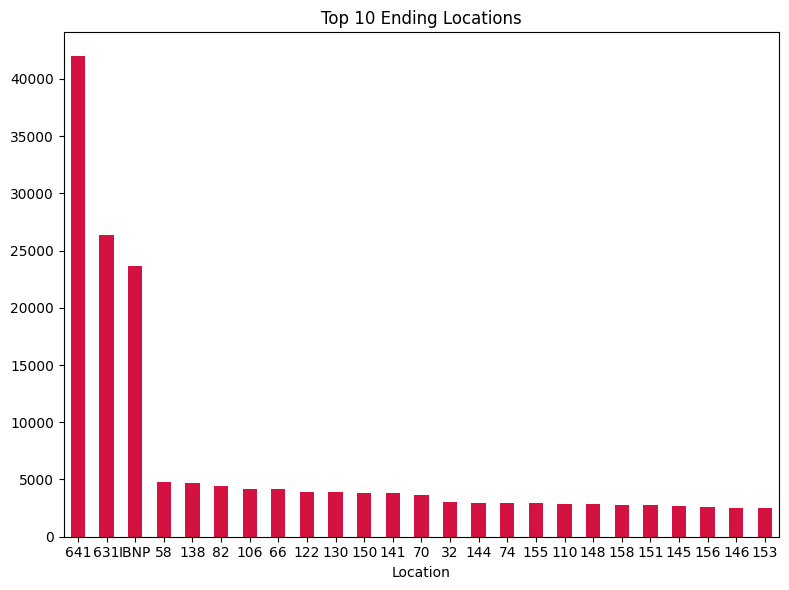

In [18]:
# Get top 10 most common end locns

most_common_end_locns = df['to_locn'].value_counts().head(25)  # Limit to top 10

# Create a chart
plt.figure(figsize=(8, 6))  # Set chart size
most_common_end_locns.plot(kind='bar', color='#D31242')
plt.title('Top 10 Ending Locations')
plt.xlabel('Location')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

bubbles2 = list(zip(most_common_end_locns.index, most_common_end_locns.values))

In [19]:
for i in range(len(bubbles2)-1, -1, -1):
    if "C" in bubbles2[i][0]:
        bubbles2.pop(i)
        continue
    try:
        bubbles2[i] = (dock_map[bubbles2[i][0]], bubbles2[i][1])
    except:
        bubbles2.pop(i)
bubbles2

[((62, 63), 41970),
 ((37, 64), 26361),
 ((63, 57), 23685),
 ((59, 195), 4818),
 ((59, 115), 4658),
 ((59, 171), 4431),
 ((59, 147), 4165),
 ((59, 187), 4138),
 ((59, 131), 3911),
 ((59, 123), 3864),
 ((59, 103), 3799),
 ((38, 113), 3785),
 ((59, 183), 3646),
 ((59, 221), 3038),
 ((59, 109), 2973),
 ((59, 179), 2969),
 ((38, 99), 2925),
 ((59, 143), 2874),
 ((59, 105), 2821),
 ((59, 95), 2750),
 ((38, 103), 2731),
 ((38, 109), 2723),
 ((59, 97), 2637),
 ((59, 107), 2550),
 ((38, 101), 2522)]

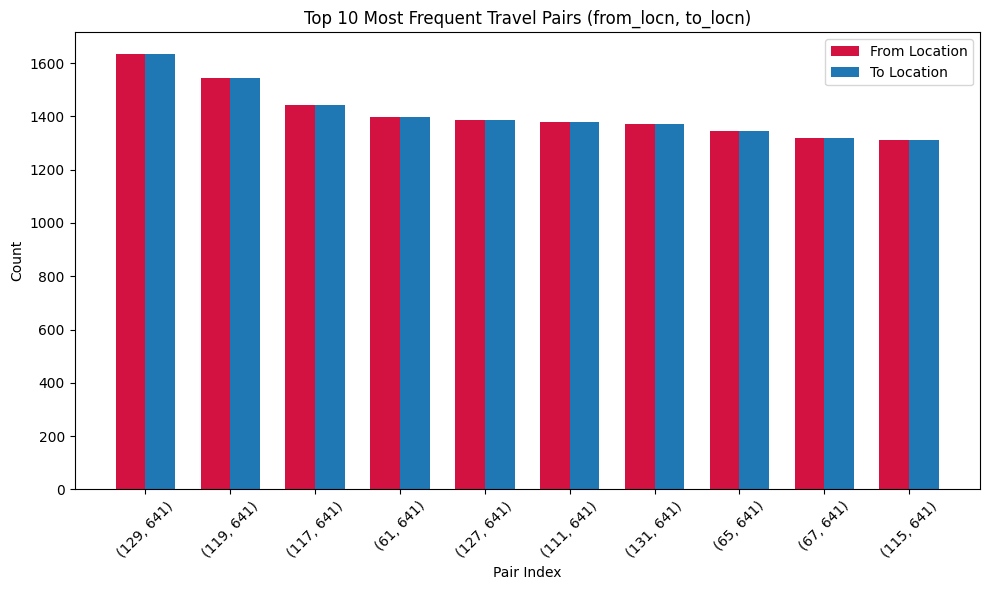

In [20]:
# Get top 10 most common routes

top_10_pairs = (df.groupby(['from_locn', 'to_locn'])
                .size()
                .to_frame(name='count')
                .reset_index()
                .sort_values(by='count', ascending=False)
                .head(10))

from_locns = top_10_pairs['from_locn'].tolist()
to_locns = top_10_pairs['to_locn'].tolist()
counts = top_10_pairs['count'].tolist()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create bars with some width separation for better readability
bar_width = 0.35
index = range(len(from_locns))

# Plot bars for from_locn and to_locn (stacked)
plt.bar(index, counts, bar_width, label='From Location', color='#D31242')
plt.bar([p + bar_width for p in index], counts, bar_width, label='To Location')

# Set labels and title
plt.xlabel('Pair Index')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Travel Pairs (from_locn, to_locn)')

# Set x-axis tick labels (pairs of from_locn and to_locn)
plt.xticks([i + bar_width / 2 for i in index], ['(%s, %s)' % (f, t) for f, t in zip(from_locns, to_locns)])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
bubbles += bubbles2
bubbles

[((50, 65), 33637),
 ((38, 129), 7276),
 ((38, 125), 7013),
 ((55, 157), 6963),
 ((38, 127), 6946),
 ((38, 141), 6944),
 ((38, 135), 6883),
 ((38, 123), 6847),
 ((38, 137), 6810),
 ((38, 189), 6662),
 ((38, 133), 6581),
 ((38, 193), 6440),
 ((38, 139), 6345),
 ((38, 143), 6292),
 ((38, 145), 5990),
 ((38, 147), 5939),
 ((38, 119), 5929),
 ((38, 175), 5923),
 ((38, 177), 5823),
 ((38, 203), 5817),
 ((38, 183), 5749),
 ((38, 187), 5733),
 ((38, 179), 5677),
 ((62, 63), 41970),
 ((37, 64), 26361),
 ((63, 57), 23685),
 ((59, 195), 4818),
 ((59, 115), 4658),
 ((59, 171), 4431),
 ((59, 147), 4165),
 ((59, 187), 4138),
 ((59, 131), 3911),
 ((59, 123), 3864),
 ((59, 103), 3799),
 ((38, 113), 3785),
 ((59, 183), 3646),
 ((59, 221), 3038),
 ((59, 109), 2973),
 ((59, 179), 2969),
 ((38, 99), 2925),
 ((59, 143), 2874),
 ((59, 105), 2821),
 ((59, 95), 2750),
 ((38, 103), 2731),
 ((38, 109), 2723),
 ((59, 97), 2637),
 ((59, 107), 2550),
 ((38, 101), 2522)]

# Distributions of Avg Distance per Pallet

Text(0.5, 0, 'Average Distance per Pallet (ft)')

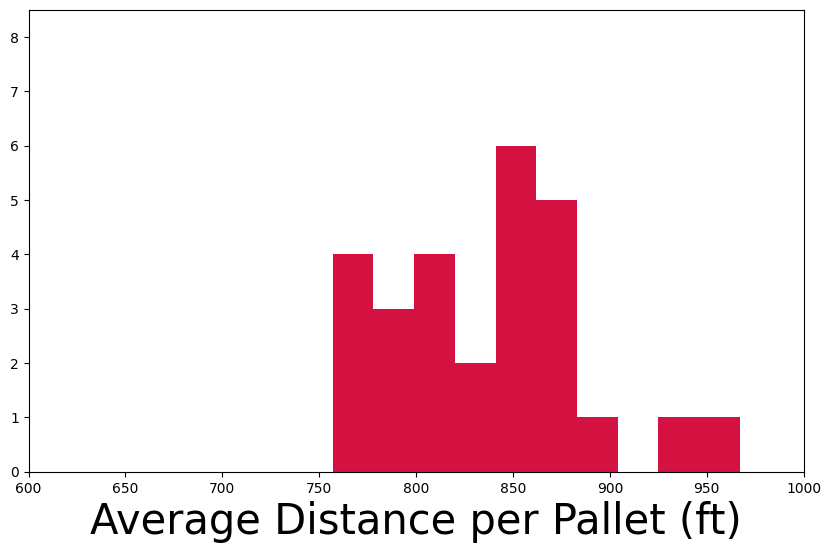

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6))
old_dist = [798.0, 843.0, 793.0, 848.0, 802.0, 812.0, 807.0, 967.0, 757.0, 860.0, 762.0, 769.0, 867.0, 770.0, 886.0, 795.0, 852.0, 926.0, 828.0, 872.0, 846.0, 829.0, 873.0, 850.0, 868.0, 874.0, 805.0]
new_dist = [752.0, 741.0, 705.0, 666.0, 687.0, 700.0, 675.0, 770.0, 721.0, 739.0, 716.0, 827.0, 712.0, 687.0, 745.0, 728.0, 701.0, 775.0, 651.0, 663.0, 845.0, 725.0, 765.0, 663.0, 752.0, 679.0, 665.0]
plt.hist(old_dist, color="#D31242", bins=10)
# plt.hist(new_dist, color="#7FBA00", bins=10)
plt.xlim([600, 1000])
plt.ylim([0, 8.5])
plt.xlabel("Average Distance per Pallet (ft)", size=30)

Text(0.5, 0, '% Decrease Distance per Pallet (ft)')

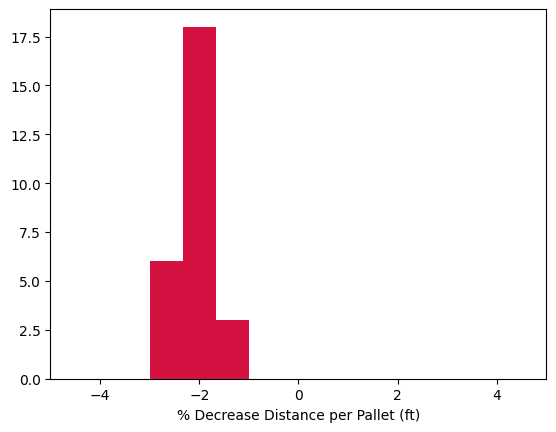

In [4]:
improvements = [3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2]
improvements = [-1 * x for x in improvements]
plt.hist(improvements, color="#D31242", bins=3)
plt.xlim([-5, 5])
plt.yticks(ticks=None)
plt.xlabel("% Decrease Distance per Pallet (ft)")